In [377]:
import pandas as pd
from pathlib import Path
import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import pandas_profiling

In [378]:
home = Path.cwd()
home

PosixPath('/Users/germanportes/Documents/general_assembly/projects/final_project')

In [380]:
stocks = pd.read_csv("../final_project/sp500_1.csv")
#stocks = pd.read_csv("../final_project/sp500_1.csv").profile_report()
stocks.sample(10)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker
451668,2016-09-28,115.089996,114.180000,114.699997,115.010002,862000.0,107.391479,0.007970,0.002703,TRV
378569,2017-11-20,90.250000,89.330002,90.080002,89.349998,440100.0,84.207405,0.010299,-0.008104,PNW
427059,2018-10-03,56.110001,55.459999,55.799999,55.470001,7383500.0,54.427563,0.011720,-0.005914,SBUX
93456,2017-08-10,68.500000,67.230003,68.040001,67.309998,2295200.0,61.580349,0.018890,-0.010729,CAH
484392,2016-12-05,136.720001,134.770004,135.889999,134.830002,509600.0,134.830002,0.014469,-0.007800,WAT
417134,2019-05-17,131.449997,129.600006,129.600006,130.449997,1682400.0,128.641907,0.014275,0.006559,SRE
275586,2019-09-04,23.120001,22.870001,22.870001,23.090000,3188100.0,23.090000,0.010931,0.009620,JNPR
31496,2016-09-26,51.759998,51.290001,51.689999,51.480000,1164200.0,47.097244,0.009164,-0.004063,AEE
84205,2016-11-22,177.419998,173.309998,173.720001,177.020004,3102400.0,162.659439,0.023715,0.018996,AVGO
481437,2017-02-03,81.239998,80.400002,81.129997,80.470001,3167700.0,75.257095,0.010448,-0.008135,WBA


In [381]:
stocks['SMA_20'] = stocks.iloc[:,1].rolling(window=20).mean()
stocks['SMA_30'] = stocks.iloc[:,1].rolling(window=30).mean()
stocks['EMA100'] = stocks.iloc[:,1].ewm(span=40,adjust=False).mean()

In [382]:
stocks.sample(20)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_20,SMA_30,EMA100
362211,2016-10-03,84.959999,84.230003,84.459999,84.440002,938800.0,76.920296,0.008667,-0.000237,OMC,85.262500,85.461667,84.874743
399086,2019-07-16,180.539993,178.000000,178.289993,180.059998,1987100.0,179.184662,0.014270,0.009928,RTN,178.827000,180.215667,179.497620
499758,2018-01-08,74.779999,73.150002,74.250000,74.639999,2483100.0,72.465683,0.022283,0.005253,XLNX,69.675499,70.050666,70.540595
77384,2017-10-30,26.309999,25.209999,26.250000,25.299999,2464200.0,23.422655,0.043633,-0.036191,HRB,25.960500,26.211000,26.686980
47225,2018-02-27,144.309998,142.419998,142.940002,142.460007,1360600.0,139.886780,0.013271,-0.003358,AON,142.249501,141.048000,140.891183
352600,2018-08-14,173.750000,171.660004,171.660004,172.190002,1634600.0,168.900223,0.012175,0.003087,NSC,169.594999,165.422665,164.493978
233268,2019-02-22,56.240002,54.689999,56.180000,55.020000,1551900.0,53.473717,0.028342,-0.020648,HP,56.728001,55.701001,56.270977
256460,2019-06-12,85.480003,84.750000,84.930000,85.480003,1431000.0,84.945518,0.008614,0.006476,ICE,83.252501,82.560334,82.120754
72564,2018-09-14,261.700012,259.959991,260.980011,260.630005,601200.0,257.391144,0.006693,-0.001341,BDX,257.988001,255.705334,254.102811
106192,2016-02-25,52.119999,51.090000,51.869999,51.360001,1800100.0,51.097542,0.020160,-0.009832,CERN,55.152000,55.956333,55.967506


In [383]:
# any missing data
stocks.isnull().sum()

Date               0
High               0
Low                0
Open               0
Close              0
Volume             0
Adj Close          0
HL_pct_diff        0
daily_pct_chng     0
ticker             0
SMA_20            19
SMA_30            29
EMA100             0
dtype: int64

In [384]:
#size
stocks.shape

(505207, 13)

In [385]:
# Establish our target variables: "runs"
stocks['Open'].describe()

count    505207.000000
mean        106.484699
std         171.854410
min           1.760000
25%          44.410000
50%          72.309998
75%         116.709999
max        3753.000000
Name: Open, dtype: float64

In [386]:
# to find out our predictors... use "correlations"
corrs = stocks.corr()
corrs['Open'].sort_values()

Volume           -0.119550
HL_pct_diff      -0.026074
daily_pct_chng   -0.004300
SMA_30            0.988364
EMA100            0.988441
SMA_20            0.992455
Adj Close         0.999627
Close             0.999864
Low               0.999923
High              0.999938
Open              1.000000
Name: Open, dtype: float64

In [387]:
# How many unique companies are there?
stocks['ticker'].nunique()

505

In [388]:
stocks.sort_values(by = 'ticker', ascending=True).head(5)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_20,SMA_30,EMA100
13105,2015-10-02,34.680000,33.119999,33.180000,34.669998,3519400.0,33.370094,0.047101,0.044907,A,50.484499,50.402666,50.591417
13448,2017-02-13,50.889999,50.419998,50.630001,50.520000,1568300.0,49.292866,0.009322,-0.002173,A,49.132000,48.735334,48.425409
13447,2017-02-10,50.590000,50.020000,50.509998,50.360001,2092500.0,49.136753,0.011395,-0.002970,A,49.030000,48.572334,48.299020
13446,2017-02-09,50.799999,49.930000,49.930000,50.470001,2557700.0,49.244080,0.017424,0.010815,A,48.945500,48.442667,48.181534
13445,2017-02-08,50.029999,49.230000,49.369999,49.930000,2107100.0,48.717190,0.016250,0.011343,A,48.879500,48.304667,48.047254


In [389]:
# create new column to define change in stock prices from opening and closing price
stocks["change"] = stocks.groupby("ticker")["Close"].pct_change(1)

In [390]:
stocks.sample(5)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_20,SMA_30,EMA100,change
70416,2018-03-08,68.040001,67.099998,67.199997,67.820000,3553900.0,66.747093,0.014009,0.009226,BAX,67.255000,68.301667,67.814512,0.011937
183155,2016-08-25,91.769997,90.300003,90.559998,91.230003,1419400.0,87.647774,0.016279,0.007398,EL,93.445999,93.542333,93.240817,0.008066
289118,2017-05-15,141.020004,139.160004,139.399994,140.529999,594700.0,140.529999,0.013366,0.008106,LH,142.291500,142.882000,142.214622,0.008685
278130,2017-10-05,18.879999,18.490000,18.590000,18.770000,13747800.0,17.571386,0.021092,0.009683,KEY,18.279500,17.984333,18.247595,0.010770
214537,2016-10-20,88.139999,87.180000,87.519997,87.260002,149800.0,87.260002,0.011012,-0.002971,IT,88.931500,89.314333,90.196527,-0.007958


In [391]:
# How many unique tickers are there?
stocks['ticker'].nunique()

505

In [392]:
# count of tickers/companies?
top_stocks=stocks['ticker'].value_counts().sort_values(ascending=False).head(10)
top_stocks

ACN     1260
ABMD    1260
ABT     1260
ABC     1260
ADBE    1260
MYL     1008
TJX     1008
AME     1008
INTC    1008
CBOE    1008
Name: ticker, dtype: int64

In [393]:
# Which stocks have the highest volume or traded daily?
stocks.sort_values(by = 'Volume', ascending=False).sample(20)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_20,SMA_30,EMA100,change
496803,2018-03-08,180.520004,171.600006,173.240005,179.110001,6348200.0,172.040649,0.051981,0.033884,WYNN,168.817000,172.213334,170.467775,0.063535
176605,2018-08-29,76.900002,76.260002,76.730003,76.800003,1576500.0,74.485458,0.008392,0.000912,EMR,74.881000,73.548667,73.685088,0.003528
503231,2015-11-27,30.100000,29.500000,30.000000,30.090000,763200.0,28.320259,0.020339,0.003000,ZION,30.130000,29.658000,43.622997,0.005010
296008,2017-10-26,77.360001,76.629997,76.629997,76.989998,1139100.0,73.662491,0.009526,0.004698,LNC,75.617999,74.611000,74.009338,0.006932
132080,2018-11-15,134.679993,127.139999,127.970001,134.589996,2389900.0,134.039551,0.059305,0.051731,CXO,140.805500,145.584001,143.296530,0.045035
88570,2018-03-22,24.510000,23.950001,24.180000,23.959999,6194600.0,23.502157,0.023382,-0.009098,COG,25.295500,24.898333,25.612445,-0.017630
393401,2016-11-08,29.200001,28.450001,28.629999,29.000000,1918900.0,28.870394,0.026362,0.012924,PWR,28.630500,28.549000,28.003615,0.012924
136807,2017-08-21,31.940001,31.540001,31.830000,31.900000,917700.0,31.900000,0.012682,0.002199,CPRT,31.777500,31.663333,31.641511,0.000627
149349,2019-01-18,166.190002,161.839996,162.000000,164.610001,3879800.0,162.325333,0.026878,0.016111,DE,153.432500,152.745000,153.242235,0.028363
461242,2018-11-12,92.690002,91.029999,92.360001,91.199997,2903200.0,91.199997,0.018236,-0.012560,UAL,88.936000,87.523000,88.129753,-0.012453


In [394]:
stocks.groupby(['ticker', 'High'])['High'].count()
stocks.sample(5)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_20,SMA_30,EMA100,change
484902,2018-12-14,191.259995,188.279999,189.529999,188.970001,468300.0,188.970001,0.015827,-0.002955,WAT,197.724498,197.906999,195.584074,-0.011611
421043,2018-11-16,94.839996,93.589996,93.650002,94.839996,710600.0,90.999741,0.013356,0.012707,SLG,94.065000,93.923667,95.597712,0.011735
135730,2017-05-12,208.300003,207.100006,207.139999,207.589996,264300.0,207.472351,0.005794,0.002172,COO,203.184999,201.779999,201.319413,0.000916
198394,2017-02-15,27.780001,27.290001,27.780001,27.559999,6620700.0,25.548569,0.017955,-0.007919,FITB,26.777500,26.904000,26.690288,0.000363
426292,2019-09-19,144.529999,142.169998,143.800003,143.039993,545400.0,143.039993,0.016600,-0.005285,SWK,139.945999,138.932666,141.492748,-0.003692


In [395]:
stocks_volume=stocks.groupby('ticker')['Volume'].sum().sort_values(ascending=False)
stocks_volume.head()

ticker
BAC     7.998436e+10
GE      6.550756e+10
AMD     5.947630e+10
F       3.855452e+10
AAPL    3.329668e+10
Name: Volume, dtype: float64

In [396]:
stocks = stocks.sort_values(by =['ticker', 'Volume'], ascending=False)
stocks.sample(20)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_20,SMA_30,EMA100,change
96270,2016-10-10,89.500000,88.139999,89.099998,88.220001,3785700.0,81.380119,0.015430,-0.009877,CAT,85.540500,84.635334,84.866778,-0.002826
300661,2016-04-15,77.459999,76.339996,76.589996,77.309998,4967200.0,72.397545,0.014671,0.009401,LOW,76.133000,74.941667,74.391148,0.010588
459491,2015-10-21,94.879997,93.190002,94.300003,93.410004,4248400.0,85.205864,0.018135,-0.009438,UNP,75.517000,56.625033,58.824779,-0.003520
391113,2015-10-12,101.599998,100.080002,101.070000,100.459999,569800.0,99.879761,0.015188,-0.006035,PVH,62.592000,53.358334,57.018561,-0.001789
69644,2019-02-14,52.130001,50.990002,52.130001,51.770000,3380300.0,51.134018,0.022357,-0.006906,BK,52.857000,51.411334,51.265648,-0.012588
395600,2017-09-12,108.629997,107.260002,108.360001,107.529999,512000.0,102.059044,0.012773,-0.007660,DGX,107.477499,107.495333,107.974736,-0.006468
163707,2019-06-26,130.330002,127.419998,129.889999,127.470001,669500.0,126.537872,0.022838,-0.018631,DTE,129.502000,129.046001,128.470574,-0.021118
371393,2017-06-01,16.940001,16.540001,16.660000,16.889999,3627100.0,15.442581,0.024184,0.013805,PBCT,17.155500,17.404667,17.490396,0.019312
8974,2019-05-15,27.790001,26.730000,26.870001,27.580000,55689900.0,27.580000,0.039656,0.026423,AMD,28.058500,28.270000,27.316291,0.009517
196659,2018-03-29,242.580002,236.800003,236.940002,240.110001,1923500.0,235.378250,0.024409,0.013379,FDX,246.667001,247.727001,248.864851,0.022615


In [215]:
# top 5 stocks based on daily traded volume
top_5= stocks.loc[stocks['ticker'].isin(['BAC', 'GE', 'AMD', 'F', 'AAPL'])]
top_5.sample(20)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_20,SMA_30,EMA100,change
51466,2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,155.308350,0.071633,0.059811,AAPL,171.181001,176.868667,182.428765,0.070422
51149,2017-09-21,155.800003,152.750000,155.800003,153.389999,37511700.0,148.796295,0.019967,-0.015469,AAPL,161.553501,161.104335,158.962648,-0.017172
216352,2016-01-05,29.653847,29.278847,29.500000,29.557692,57383200.0,26.459890,0.012808,0.001956,GE,29.665865,29.566026,35.252450,0.000977
206290,2016-06-16,13.140000,12.850000,12.930000,13.120000,26581200.0,10.605766,0.022568,0.014694,F,13.322000,13.364333,13.348883,0.008455
8911,2019-02-13,23.240000,22.709999,22.980000,22.850000,57544200.0,22.850000,0.023338,-0.005657,AMD,22.514500,21.728000,21.985458,0.001315
207079,2019-08-06,9.510000,9.360000,9.420000,9.480000,51856100.0,9.480000,0.016026,0.006369,F,9.994000,10.068000,9.948172,0.027086
206468,2017-03-02,12.750000,12.580000,12.720000,12.660000,33245100.0,10.643845,0.013514,-0.004717,F,12.615000,12.592667,12.614634,-0.002364
67915,2016-04-05,13.340000,13.160000,13.300000,13.190000,78445900.0,12.388645,0.013678,-0.008271,BAC,13.658500,13.457333,13.777092,-0.023686
206657,2017-11-29,12.570000,12.230000,12.240000,12.560000,64866000.0,10.974124,0.027801,0.026144,F,12.233500,12.234667,12.148763,0.028665
216626,2017-02-06,28.605770,28.432692,28.538462,28.519230,24674100.0,26.328629,0.006087,-0.000674,GE,29.509135,29.890064,29.654687,-0.001347


In [397]:
stocks.groupby(by='ticker', axis=0).Volume.mean().sort_values(ascending=False)

ticker
BAC     7.934957e+07
GE      6.498766e+07
AMD     5.900427e+07
F       3.824853e+07
AAPL    3.303242e+07
            ...     
RE      3.312584e+05
TFX     3.055278e+05
MKTX    2.698898e+05
MTD     1.803701e+05
NVR     2.862312e+04
Name: Volume, Length: 505, dtype: float64

In [398]:
# any missing data
top_5.isnull().sum()

Date              0
High              0
Low               0
Open              0
Close             0
Volume            0
Adj Close         0
HL_pct_diff       0
daily_pct_chng    0
ticker            0
SMA_20            0
SMA_30            0
EMA100            0
change            5
dtype: int64

In [399]:
# size
top_5.shape

(5040, 14)

In [400]:
top_5.to_csv('top5.csv')

In [401]:
# establish target variable: High
top_5['High'].describe()

count    5040.000000
mean       45.153616
std        58.424020
min         1.770000
25%        11.930000
50%        20.075000
75%        30.480770
max       233.470001
Name: High, dtype: float64

In [402]:
corrs = top_5.corr()
corrs['High'].sort_values()

Volume           -0.255022
HL_pct_diff      -0.231771
change           -0.000067
daily_pct_chng    0.008798
EMA100            0.965055
SMA_30            0.965532
SMA_20            0.977896
Adj Close         0.999677
Low               0.999918
Close             0.999941
Open              0.999950
High              1.000000
Name: High, dtype: float64

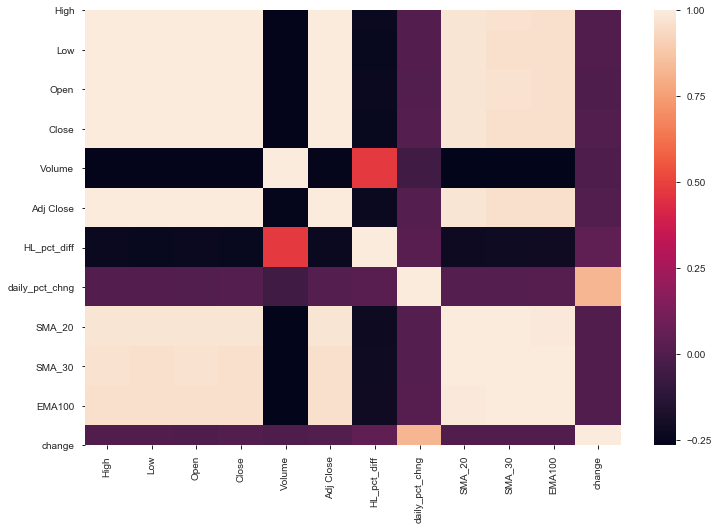

In [225]:
plt.figure(figsize=(12,8))
sns.heatmap(corrs);

# Preprocessing

In [403]:
top_5.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'HL_pct_diff', 'daily_pct_chng', 'ticker', 'SMA_20', 'SMA_30', 'EMA100',
       'change'],
      dtype='object')

In [624]:
#stock_high = top_5[['Low', 'Open', 'Close', 'Volume', 'Adj Close','daily_pct_chng', 'ticker']]
stock_high = top_5[['Low', 'Open', 'Close', 'Volume', 'Adj Close','daily_pct_chng']]

In [625]:
stock_high.sample(5)

,Low,Open,Close,Volume,Adj Close,daily_pct_chng
68132,23.170000,23.170000,23.400000,105342500.0,22.237724,0.009927
8564,12.430000,12.850000,12.450000,68302000.0,12.450000,-0.031128
216960,13.000000,13.182693,13.269231,73266300.0,12.970133,0.006565
216303,28.288462,28.557692,28.375000,79941800.0,25.212572,-0.006397
216890,13.932693,13.971154,13.932693,55029100.0,13.618640,-0.002753


In [588]:
def ticker_name(row):
    if 'BAC' in row:
        return 1
    if 'GE' in row:
        return 2
    if 'AMD' in row:
        return 3
    if 'F' in row: 
        return 4
    else:
        return 5

In [626]:
#stock_high['ticker']=stock_high['ticker'].apply(ticker_name)

In [627]:
stock_high.describe()

,Low,Open,Close,Volume,Adj Close,daily_pct_chng
count,5040.000000,5040.000000,5040.000000,5.040000e+03,5040.000000,5040.000000
mean,44.282006,44.714622,44.725868,5.492449e+07,43.179174,0.000130
std,57.452972,57.924040,57.952864,3.966835e+07,56.915789,0.019006
min,1.720000,1.760000,1.740000,2.606600e+06,1.740000,-0.124676
25%,11.610000,11.750000,11.757500,2.936915e+07,10.407163,-0.008149
50%,19.127308,19.495000,19.595000,4.393960e+07,19.220394,0.000000
75%,29.980192,30.202500,30.202500,6.729750e+07,29.276264,0.007960
max,229.779999,230.779999,232.070007,4.485859e+08,228.523819,0.250784


In [628]:
stock_high.sample(10)

,Low,Open,Close,Volume,Adj Close,daily_pct_chng
50812,94.519997,94.639999,95.220001,32026000.0,90.278229,0.006129
216648,28.423077,28.605770,28.519230,26977800.0,26.538628,-0.003025
206526,10.870000,11.060000,10.960000,46638800.0,9.338764,-0.009042
217181,9.220000,9.300000,9.330000,40504600.0,9.310963,0.003226
50863,104.769997,104.809998,105.790001,30202600.0,100.299644,0.009350
68455,29.879999,30.010000,30.160000,44166700.0,29.224075,0.004998
68251,24.320000,24.549999,24.370001,53210600.0,23.306437,-0.007332
216832,17.605770,17.740385,17.769230,57365800.0,16.987808,0.001626
206447,12.190000,12.310000,12.360000,46974500.0,10.391622,0.004062
207069,10.060000,10.130000,10.170000,74624800.0,10.170000,0.003949


In [629]:
# standardize variables
from sklearn.preprocessing import StandardScaler
std_scaler =StandardScaler()

In [630]:
std_scaler.fit(stock_high)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [631]:
scaled_stock =std_scaler.transform(stock_high)

In [632]:
import pickle
filename = open('fitted_scaler.pkl', 'wb')
pickle.dump(std_scaler, filename)
filename.close()

In [633]:
scaled_df=pd.DataFrame(scaled_stock, columns = stock_high.columns)
scaled_df.head()

,Low,Open,Close,Volume,Adj Close,daily_pct_chng
0,-0.268696,-0.264517,-0.268728,9.924801,-0.303541,-0.437158
1,-0.637663,-0.624580,-0.633610,8.726316,-0.618129,-3.272554
2,-0.607468,-0.607009,-0.603251,7.756588,-0.587596,1.157833
3,-0.605627,-0.596716,-0.602919,7.660550,-0.587495,-1.900396
4,-0.478587,-0.460085,-0.474818,6.810501,-0.469592,-2.499273


In [634]:
scaled_df.mean() 

Low              -5.203950e-16
Open             -2.728858e-16
Close            -4.667342e-16
Volume            3.962439e-16
Adj Close        -7.872891e-16
daily_pct_chng    2.827324e-17
dtype: float64

In [635]:
scaled_df.std()

Low               1.000099
Open              1.000099
Close             1.000099
Volume            1.000099
Adj Close         1.000099
daily_pct_chng    1.000099
dtype: float64

# Model Building

In [636]:
# target variable
y = top_5['High']
y.shape
y.head

<bound method NDFrame.head of 216320     29.567308
217261      8.630000
217125     10.355769
217063     10.961538
216822     18.153847
             ...    
50711     109.000000
50692     118.410004
51352     191.839996
50943     111.870003
51596     204.440002
Name: High, Length: 5040, dtype: float64>

In [637]:
#X= top_5.drop('High', axis=1)
X = scaled_df.copy()
X.shape
X.head()

,Low,Open,Close,Volume,Adj Close,daily_pct_chng
0,-0.268696,-0.264517,-0.268728,9.924801,-0.303541,-0.437158
1,-0.637663,-0.624580,-0.633610,8.726316,-0.618129,-3.272554
2,-0.607468,-0.607009,-0.603251,7.756588,-0.587596,1.157833
3,-0.605627,-0.596716,-0.602919,7.660550,-0.587495,-1.900396
4,-0.478587,-0.460085,-0.474818,6.810501,-0.469592,-2.499273


In [638]:
# train, test, split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=12)

In [639]:
# instantiate
mystocks= LinearRegression()
#linreg=LinearRegression()
#linreg.fit(X,y)

In [640]:
# fit model  to training dataset
mystocks.fit(X_train, y_train)  # normalize = False, data is expected to be already centered
#y_pred = linreg.predict(X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [641]:
# predict the y_values on testing dataset
y_pred = mystocks.predict(X_test)

In [642]:
#looking at prediction and comparing to true values
[round(x,2)for x in y_pred[:5]]

[2.11, 11.37, 12.28, 167.7, 29.71]

In [643]:
list(y_test[:5])

[2.1600000858306885,
 11.359999656677244,
 12.380000114440918,
 167.3699951171875,
 29.70000076293945]

# Evaluate Model

In [644]:
# root mean Sq error
rmse = sqrt(metrics.mean_squared_error(y_test, y_pred))
print ('on average my model errs by', rmse)

on average my model errs by 0.36546810893836595


In [645]:
comparison_array=np.full((len(y_test), ), avg_val)
coin_flip = sqrt(metrics.mean_squared_error(y_test, comparison_array))
print ('High', round(rmse-coin_flip))

High -59


In [610]:
r2=metrics.r2_score(y_test, y_pred)
r2

0.999960365314335

In [646]:
avg_val= y_train.mean()
avg_val

45.11503219273355

In [647]:
comparison = np.full(len(y_test), avg_val)
comparison

array([45.11503219, 45.11503219, 45.11503219, ..., 45.11503219,
       45.11503219, 45.11503219])

In [648]:
sqrt(metrics.mean_squared_error(y_test, comparison))

58.954591594599464

In [649]:
y_pred

array([  2.11348732,  11.36891487,  12.27863879, ..., 110.58486535,
        28.62013014, 118.97273316])

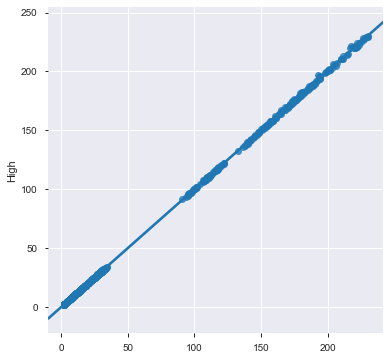

In [564]:
plt.figure(figsize = (6,6))
sns.regplot(x=y_pred, y=y_test);

In [650]:
# pickle final model
filename = open('stock_model.pkl', 'wb')
pickle.dump(stocks, filename)
filename.close()

In [651]:
X_test.sample(10)

,Low,Open,Close,Volume,Adj Close,daily_pct_chng
2900,-0.262362,-0.265626,-0.266033,-0.230761,-0.249825,-0.042708
3027,-0.303618,-0.264245,-0.279839,5.103429,-0.257760,-1.617136
3263,-0.326247,-0.318114,-0.323672,0.592816,-0.302392,-0.647332
3638,-0.483957,-0.487145,-0.480712,-0.317942,-0.462293,1.173172
2678,-0.260970,-0.265799,-0.260511,0.127049,-0.246882,0.549539
3940,-0.735492,-0.735081,-0.736117,-1.104947,-0.722352,-1.728090
3234,-0.302051,-0.305337,-0.289331,0.706064,-0.267425,1.803675
4865,2.628636,2.654004,2.603135,-0.853515,2.664737,-0.765261
4502,2.099282,2.122393,2.134086,-0.621375,2.133600,0.228596
3621,-0.549582,-0.547575,-0.547842,-0.293903,-0.530647,-0.087783


In [652]:
X_test.loc[1659].head(20)

Low              -0.559330
Open             -0.562078
Close            -0.559404
Volume           -0.625918
Adj Close        -0.581954
daily_pct_chng    0.642290
Name: 1659, dtype: float64

In [653]:
y_test.head

<bound method NDFrame.head of 8079        2.160000
206533     11.360000
206327     12.380000
51238     167.369995
68624      29.700001
             ...    
8331        6.650000
206767     11.280000
50652     109.620003
216662     28.567308
50668     119.230003
Name: High, Length: 1260, dtype: float64>

In [654]:
stock_filter = top_5.loc[top_5['ticker']=='AAPL']
print(len(stock_filter))
print (stock_filter.head())

1008
             Date        High         Low        Open       Close  \
50732  2016-01-27   96.629997   93.339996   96.040001   93.419998   
50795  2016-04-27   98.709999   95.680000   96.000000   97.820000   
50988  2017-02-01  130.490005  127.010002  127.029999  128.750000   
50892  2016-09-14  113.029999  108.599998  108.730003  111.769997   
50707  2015-12-18  109.519997  105.809998  108.910004  106.029999   

            Volume   Adj Close  HL_pct_diff  daily_pct_chng ticker  \
50732  133369700.0   87.560509     0.035247       -0.027280   AAPL   
50795  114602100.0   92.182045     0.031668        0.018958   AAPL   
50988  111985000.0  123.359444     0.027399        0.013540   AAPL   
50892  110888700.0  106.543358     0.040792        0.027959   AAPL   
50707   96453300.0   99.379585     0.035063       -0.026444   AAPL   

           SMA_20      SMA_30      EMA100    change  
50732  101.617000  104.407000  104.802561 -0.065707  
50795  109.012000  108.406000  106.467073 -0.062578

In [655]:
stock_filter['High'].mean()

155.42382948739188

In [656]:
print ('actual high', y_test[206533])
print ('predicted', round(y_pred[1234]))


actual high 11.359999656677244
predicted 13.0


In [657]:
# predict the y-values
y_pred = linreg.predict(X_test)
for i in y_pred[:5]:
    print(round(i,0))

2.0
11.0
12.0
168.0
30.0


In [622]:
# How similar are those to the actual high prices?
for i in y_test[:5]:
    print(round(i,0))

2.0
11.0
12.0
167.0
30.0


In [658]:
# the residuals are the difference between true y values and predicted y values.
residuals= y_test - y_pred
for i in residuals[:5]:
    print(round(i,0))

0.0
-0.0
0.0
-0.0
-0.0


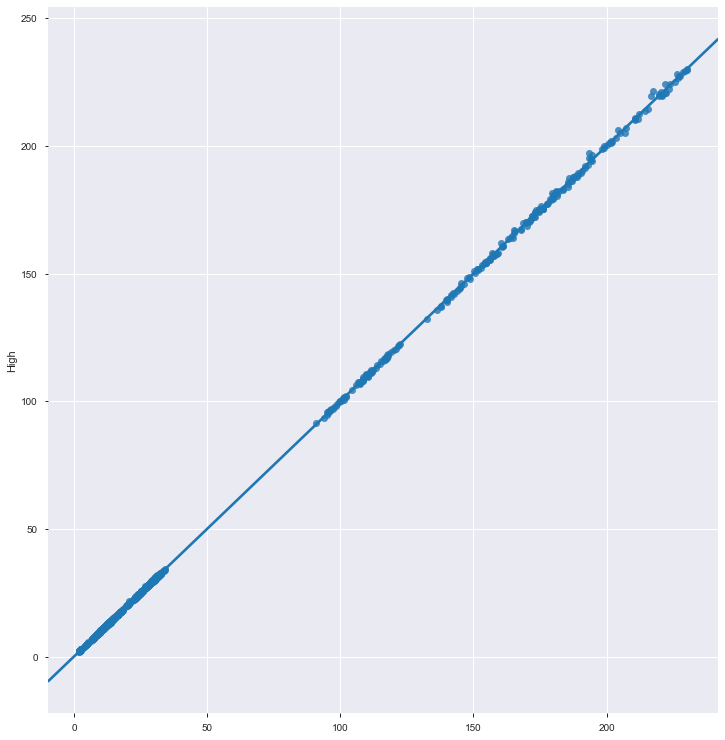

In [518]:
# Use a scatter plot to compare our predictions to the actual values
# Remember: when x==y, that indicates an accurate model! 
# Do we have that?
plt.figure(figsize=(12, 13))
sns.regplot(y_pred, y_test);